In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset  = pd.read_csv("diabetes_dataset.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


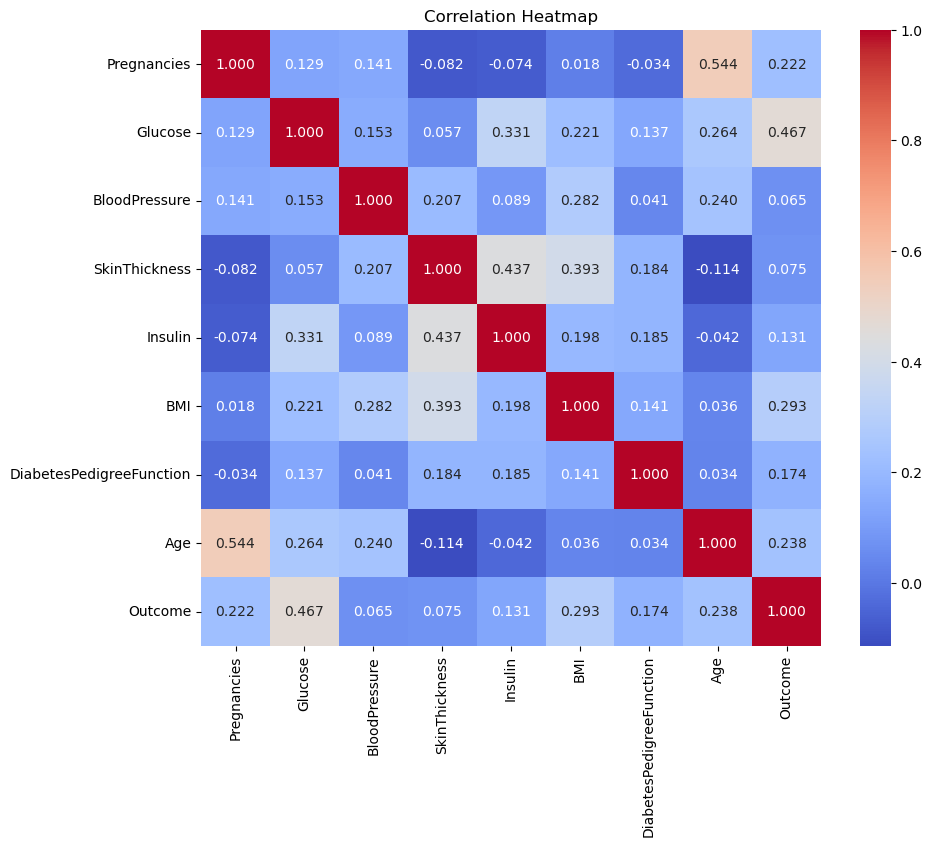

In [15]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot=True, fmt = ".3f", cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x800 with 0 Axes>

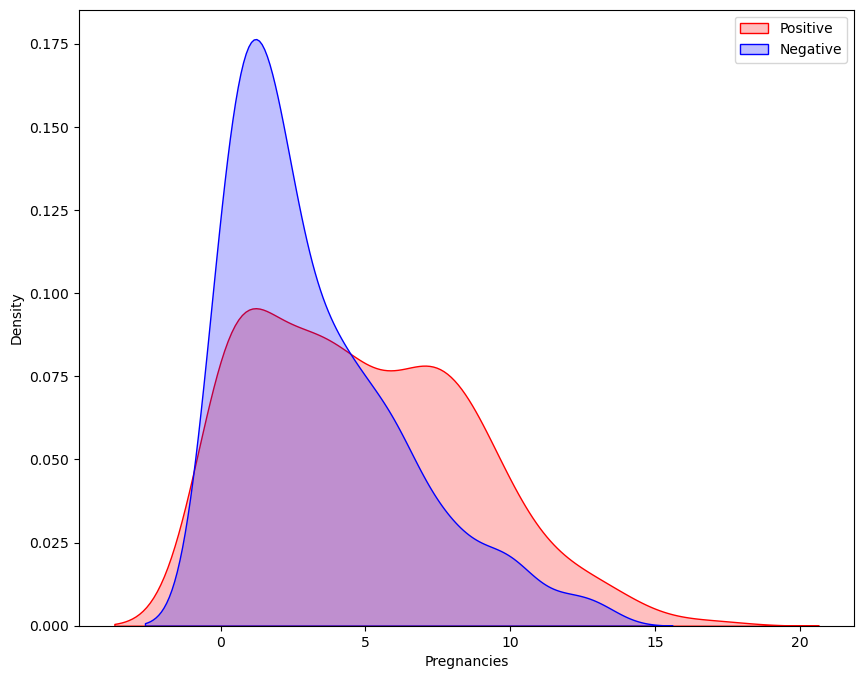

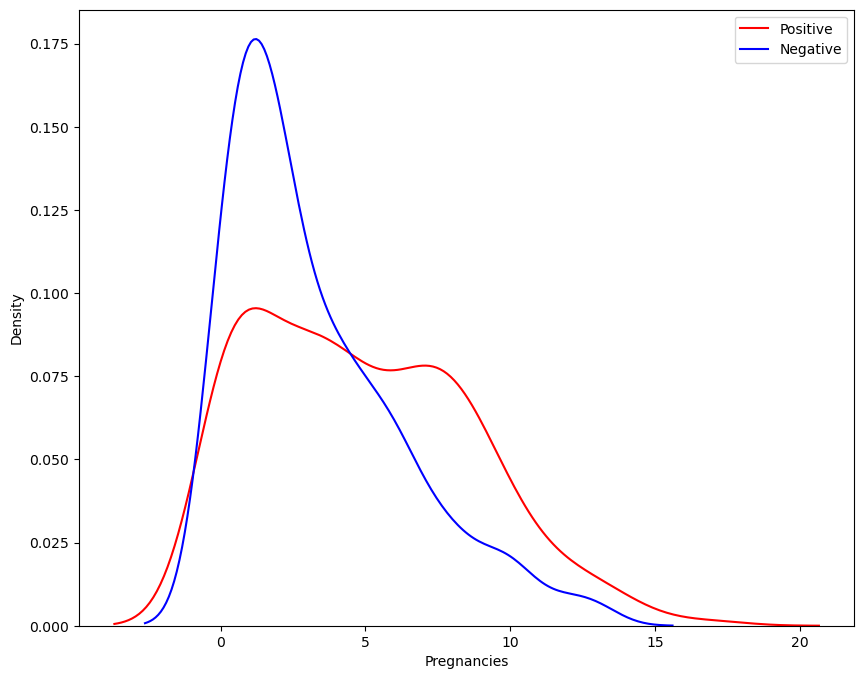

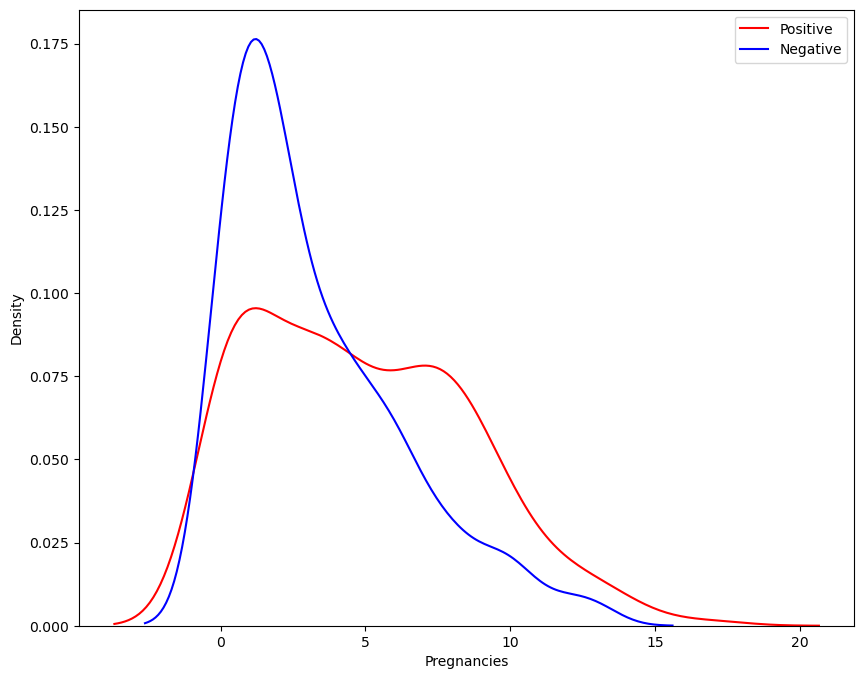

In [20]:
plt.figure(figsize = (10,8))
#plotting density function of pregnancies and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Red")
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "Blue")
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive" , "Negative"])
plt.show()

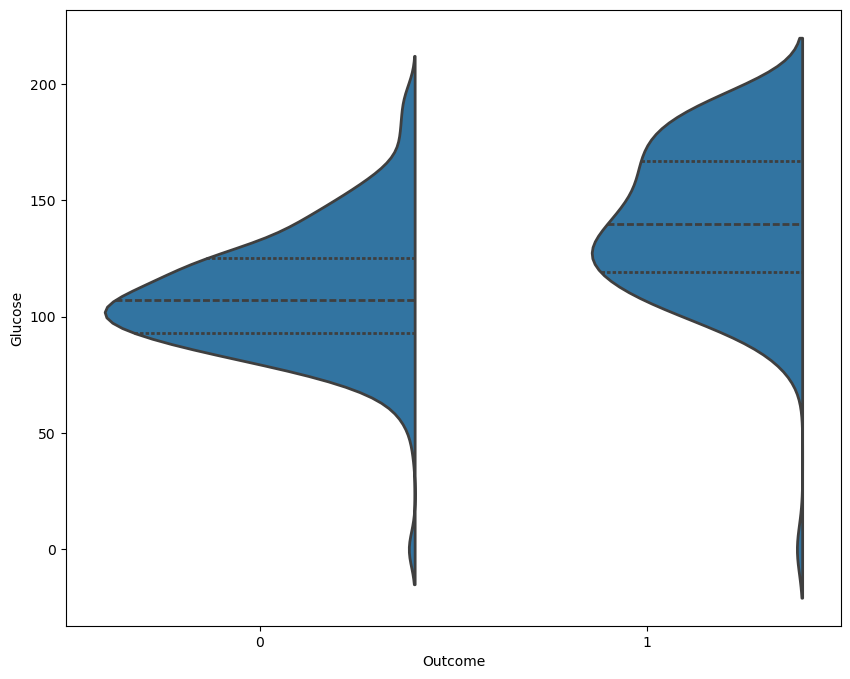

In [21]:
plt.figure(figsize = (10,8))
sns.violinplot(data = dataset, x="Outcome",y = "Glucose", split = True, linewidth = 2, inner = "quart")
plt.show()


/var/folders/qk/wp3w1_ss1jv_21td2hxjjsc00000gn/T/ipykernel_1915/3304001996.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red", shade = True)
/var/folders/qk/wp3w1_ss1jv_21td2hxjjsc00000gn/T/ipykernel_1915/3304001996.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Blue", shade  = True)


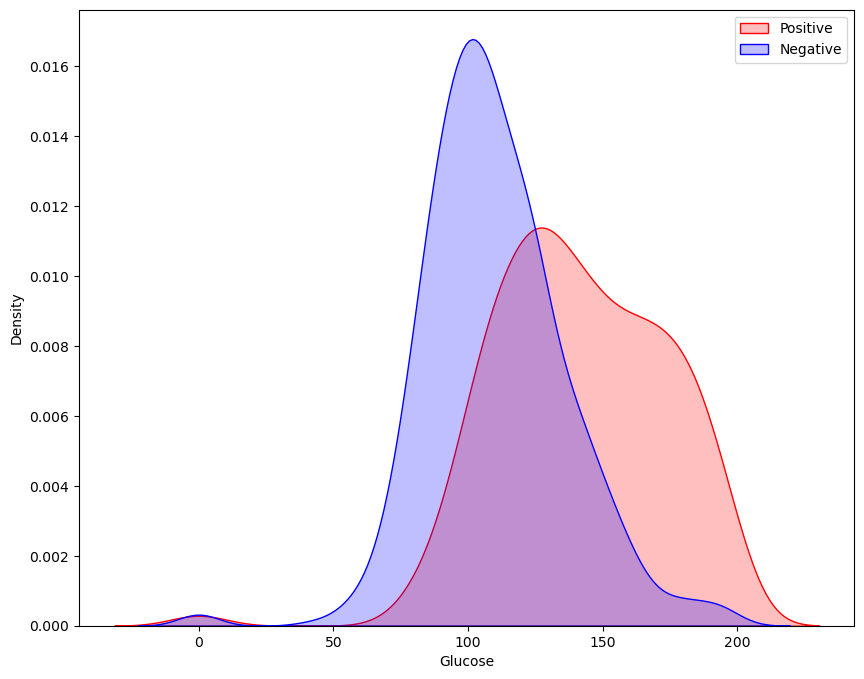

In [23]:
plt.figure(figsize = (10,8))
#plotting density function of Glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red", shade = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Blue", shade  = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive" , "Negative"])
plt.show()

In [24]:
dataset["Glucose"] = dataset["Glucose"].replace(0,dataset["Glucose"].median())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
dataset["BMI"] = dataset["BMI"].replace(0,dataset["BMI"].mean())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].mean())
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [25]:
x = dataset.drop(["Outcome"], axis=1)
y = dataset["Outcome"]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,72,20.536458,79.799479,42.4,0.205,29


In [31]:
#importing the model
from sklearn.neighbors import KNeighborsClassifier

In [32]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train,y_train)
    #check accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

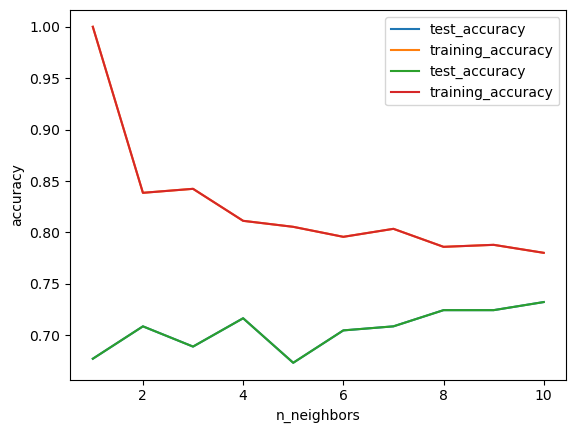

In [34]:
plt.plot(range(1,11), test_accuracy, label = "test_accuracy")
plt.plot(range(1,11), training_accuracy, label = "training_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train), ":Training accuracy")
print(knn.score(x_test,y_test), ":Test accuracy")

0.7801556420233463 :Training accuracy
0.7322834645669292 :Test accuracy


In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train), ":Training accuracy")
print(dt.score(x_test,y_test), ":Test accuracy")

1.0 :Training accuracy
0.6811023622047244 :Test accuracy


In [37]:
dt1 = DecisionTreeClassifier(random_state = 0, max_depth = 5)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train), ":Training accuracy")
print(dt1.score(x_test,y_test), ":Test accuracy")

0.8463035019455253 :Training accuracy
0.7283464566929134 :Test accuracy


In [39]:
from sklearn.neural_network import MLPClassifier
mlp  = MLPClassifier(random_state = 0)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train), ":Training accuracy")
print(mlp.score(x_test,y_test), ":Test accuracy")

0.7626459143968871 :Training accuracy
0.6850393700787402 :Test accuracy


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [45]:
mlp1  = MLPClassifier(random_state = 0)
mlp1.fit(x_train,y_train)
print(mlp1.score(x_train,y_train), ":Training accuracy")
print(mlp1.score(x_test,y_test), ":Test accuracy")

0.7626459143968871 :Training accuracy
0.6850393700787402 :Test accuracy
